### Latar Belakang

easyTrip adalah perushaan yang bergerak di bidang jasa transportasi online dan ingin membuat kasus studi (business case) apakah menguntungkan (profitable) untuk memulai usaha jasa transportasi online di kota New York City.

Perusahaan ini menganalisa data yang telah tersedia secara online di website perusahaan taxi NYC TLC (Taxi & Limousine Commission) di(https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). 

Setelah menganalisa data yang tersedia, sangat diharapkan bahwa kasus studi bisnis (business case) dapat memberikan pentunjuk, rekomendasi atau insight apakah bisnis proposal masuk ke New York City ini dapat dilanjutkan ke tahap berikut.


### Pernyataan Masalah

Perusahaan jasa online ini ingin mengetahui faktor-faktor apa yang dapat memberikan insentif lebih (tips) untuk para driver online yang ingin di rekrut. Dengan adanya informasi ini diharapkan memberikan nilai tambah (added value) untuk driver-driver yang ingin di rekrut dan dapat memberikan info secara real time apakah trip yang muncul di aplikasi online dapat memerikan tips yang lebih. 

Sebagai seorang data analyst, permasalahan sebagai berikut yang ingin dijawab:
Faktor-faktor atau (Variable-variable) apa yang menentukan seorang driver untuk mendapatkan tips terbanyak?

### Data

Untuk menjawab pertanyaan di atas, data berikut ini sudah di kumpulkan easyTrip dan dapat di akses:
https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N

Sebagai data tambahan Taxi Zone Lookup Table (CSV) - (taxi_zone_lookup.csv) dapat diakses:
https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Dataset pertama - (NYC TLC Trip Record.csv) berisi informasi sebagai berikut:
- VendorID: kode LPEP (Licensed Private Car e-hail provider) Lisensi provider penyedia panggilan taxi. 1 = Creative Mobile Technologies, LLC ; 2 = Verifone Inc.
- lpep_pickup_datetime: tanggal dan waktu sewaktu meteran di mulai.
- lpep_dropoff_datetime: tanggak dan waktu sewaktu meteran di stop.
- Passenger_count: jumlah penumpang yang naik (diisi oleh driver).
- Trip_distance: jarak tempuh dalam miles yang ter-registrasi oleh taximeter.
- PULocationID: Lokasi TLC Taxi Zone dimana taximeter di mulai (Lokasi dimana penumpang naik - Pickup Zone Penumpang).
- DOLocationID: Lokasi TLC Taxi Zone dimana taximeter di stop (Lokasi dimana penumpang turun - Drop Off Zone Penumpang).
- RateCodeID: kode rate final pada akhir perjalanan. 1 = Standard Rate, 2 = JFK, 3 = Newark, 4 = Nassau or Westchester, 5 = Negotiated Fare, 6 = Group Ride, 99 = Null/unknown
- Store_and_fwd_flag: Flag (tanda bendera) menandakan apakah trip record disimpan dalam memory kendaraan sebelum di kirim ke vendor (jasa penyedia system) aka "store and forward". Fungsi ini dikarenakan kendaraan tidak mempunya koneksi internet ke server. Y = store and forward trip, N = not a store and forward trip.
- Payment_type: kode numerik yang menandakan bentuk transaksi yang dilakukan. 1 = Credit card, 2 = Cash, 3 = No Charge, 4 = Dispute, 5 = Unknown, 6 = Voided Trip
- Fare_amount: Waktu dan jarak biaya dihitung dari taximeter. Charges tambahan seperti miscellaneous dan surcharges tidak termasuk. Hanya termasuk $0.50 dan $1 rush hour dan overnight charges.
- MTA_tax: $0.50 MTA tax yang otomatis dipicu saat taximeter digunakan.
- Improvement_surcharge: $0.30 surcharge tambahan saat panggilan trip pinggir jalan (hailed trip). Surcharge ini diterapkan dari tahun 2015.
- Tip_amount: Jumlah tips yang didapatkan dari pembayaran credit card. Cash tips tidak termasuk.
- Tolls_amount: Jumlah biaya jalan tol yang bayar dalam perjalanan.
- Trip_type: Kode yang mengindikasikan trip tersebut berawal dari panggilan pinggir jalan (street hail) atau dispatch (panggilan operator). 1 = Street-hail, 2 = Dispatch.

Dataset kedua - taxi_zone_lookup.csv bersisi informasi sebagai berikut:
- Location: kode lokasi
- Borough: Nama borough dalam New York City
- Zone: nama zone berdasarkan borough
- service_zone: bentuk service dalam zone eg: Airports (JKF, Laguardia Airports), Boro Zone, EWR (Newark Airport), Yellow Zone (khusus taxi Yellow pickup di Manattan Borough)

In [3]:
import numpy as np 
import pandas as pd 

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df_trip = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Purwadhika\NYC TLC Trip Record.csv')
df_trip

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13736\443280408.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trip = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Purwadhika\NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [5]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [6]:
df_trip.describe(include= 'all')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211,68211,63887,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
unique,NaN,66575,66519,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-01-07 23:58:06,2023-01-06 00:00:00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,6,63579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.863028,NaN,NaN,NaN,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,NaN,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,NaN,NaN,NaN,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,NaN,NaN,NaN,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,NaN,NaN,NaN,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000


In [7]:
df_trip.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


## Data Understanding untuk df_trip
- df_trip.info() menunjukan terdapatnya 68,211 baris dan 20 kolom.
- Terdapat missing values pada beberapa kolom antara lain: passenger_count, payment_type, trip_type dan congestion_surcharge. Null values pada kolom-kolom tersebut akan di investigasi lebih dalam. 
- Data format pada lpep_pickup_datetime dan lpep_dropoff_datetime berbentuk object (string) dan akan diubah ke bentuk datetime.
- Terdapat nila-nilai negatif pada kolom: fare_amount, extra, mta_tax, tip_amount, improvement_surcharge yang mungkin data dari trip yang di cancel sehingga terdapat refund. Untuk meminimalisasi skewed data pada analisis, data tersebut akan di hapus.



In [8]:
df_zone = pd.read_csv(r'C:\Users\ASUS\OneDrive\Desktop\Purwadhika\taxi_zone_lookup.csv')
df_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [9]:
df_zone.describe(include= 'all')

,LocationID,Borough,Zone,service_zone
count,265.000000,264,264,263
unique,NaN,7,261,4
top,NaN,Queens,Governor's Island/Ellis Island/Liberty Island,Boro Zone
freq,NaN,69,3,205
mean,133.000000,NaN,NaN,NaN
std,76.643112,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,67.000000,NaN,NaN,NaN
50%,133.000000,NaN,NaN,NaN
75%,199.000000,NaN,NaN,NaN


In [10]:
df_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


## Data Understanding untuk df_zone
- df_zone memiliki 265 baris dan 4 kolom.
- Terdapat Null values pada kolom: Borough, Zone dan service_zone. 
- Null values pada kolom Borough akan diisi dengan 'unknown' dan kolom Zone dengan 'Outside of NYC'.
- Kolom service_zone tidak akan dipakai untuk data analysis, maka nilai NaN akan dibiarkan.
- df_zone akan di join dengan df_trip untuk memberikan nama daerah kolom PULocationID dan DOLocationID dalam df_trip  

In [137]:
df_zone['Borough'].unique()

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn',
       'Unknown'], dtype=object)

In [138]:
df_zone['Borough'].isna().sum()

np.int64(0)

In [139]:
# Untuk kolom 'Borough' value Nan akan digantikan dengan 'unknown'

df_zone['Borough'].fillna('Unknown', inplace=True)

In [140]:
df_zone['Borough'].isna().sum() # Hasil menunjukkan tidak ada Null values

np.int64(0)

In [141]:
df_zone[(df_zone['LocationID'] == 264) | (df_zone['LocationID'] == 265) ]


,LocationID,Borough,Zone,service_zone
263,264,Unknown,Outside of NYC,NaN
264,265,Unknown,Outside of NYC,NaN


In [142]:
# Untuk kolom 'Zone' value Nan akan digantikan dengan 'Outside of NYC'

df_zone['Zone'].fillna('Outside of NYC', inplace=True)

In [143]:
df_zone[(df_zone['LocationID'] == 264) | (df_zone['LocationID'] == 265) ]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,Outside of NYC,NaN
264,265,Unknown,Outside of NYC,NaN


### Data Cleaning - NULL Values untuk kolom-kolom berikut:


In [144]:
# skew test
# pvalue > 0.05. artinya data TIDAK skew
# pvalue < 0.05. artinya data skew
# untuk passenger_count data skew (tidak parametric)
from scipy.stats import skew, skewtest

In [145]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

1. kolom: store_and_fwd_flag

In [146]:
# Dapat dilihat terdapat 4324 baris dengan Null Values
# Pada kolom: store_and_fwd_flag Null Values akan dimasukan value 'N' yang secara default berarti data yang tidak diforward ke vendor.
# Kami bisa berasumsi data yang tidak dimasukan ke vehicle memory adalah data yang tidak perlu di store and diforward ke vendor.

df_trip['store_and_fwd_flag'].isna().sum()


np.int64(0)

In [147]:
df_trip['store_and_fwd_flag'].fillna('N', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13736\2869658426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trip['store_and_fwd_flag'].fillna('N', inplace=True)


In [148]:
# Hasil menunjukan sudah tidak adanya Null values pada kolom 'store_and_fwd_flag'.

df_trip['store_and_fwd_flag'].isna().sum()

np.int64(0)

2. Kolom RateCodeID

In [149]:
# Pada kolom RateCodeID akan dianalisa dengan skew/skewtest, unique value, dan akan di tentukan nilai apa yang akan diisi untuk Null values.

df_trip['RatecodeID'].isna().sum() # skew test tidak berhasil karena masih ada data yang NA.

np.int64(0)

In [150]:
skew(df_trip['RatecodeID'].dropna()) # hasil data menunjukan positive skew (left skewed) dan sifat non-parametric.

np.float64(3.569090640743983)

In [151]:
skewtest(df_trip['RatecodeID'].dropna()) # pvalue 0.0 menunjukan data adalah skewed (pvalue < 0.05)

SkewtestResult(statistic=np.float64(189.55190334437765), pvalue=np.float64(0.0))

In [152]:
data1 = df_trip['RatecodeID'].dropna().unique() # Unique value pada 'RatecodeID' = 1,2,3,4,5,99,nan
data1

array([ 1.,  5.,  4.,  3.,  2., 99.])

<Axes: xlabel='RatecodeID', ylabel='Count'>

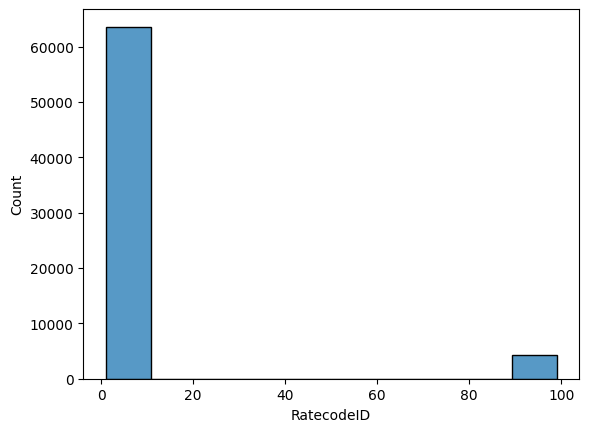

In [153]:
sns.histplot(df_trip['RatecodeID'],bins=10) 

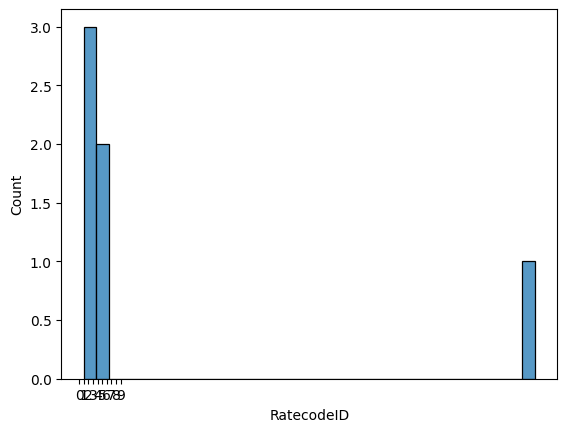

In [154]:
sns.histplot(data1)
plt.xlabel('RatecodeID')
plt.ylabel('Count')

plt.xticks(ticks= range(0,10,1))                        
# plt.yticks(ticks= range(0,60000,10))    

# plt.xticks(range(99))
# plt.yticks()
plt.show()

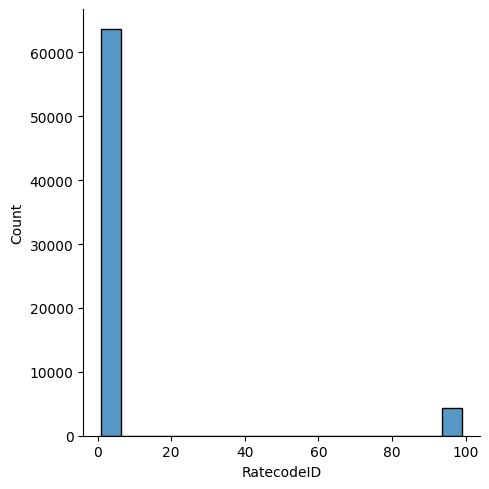

In [155]:
sns.displot(df_trip['RatecodeID'])

In [156]:
# Pada kolom RatecodeID terdapat 4324 baris dengan Null Values
# Pada kolom: RatecodeID Null Values akan dimasukan value '99' 
# karena value '99' berarti Null/Unknown 

df_trip['RatecodeID'].isna().sum()

np.int64(0)

In [157]:
df_trip['RatecodeID'].fillna(99,inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13736\1272374730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trip['RatecodeID'].fillna(99,inplace=True)


In [158]:
df_trip['RatecodeID'].isna().sum() # Dalam kolom 'RatecodeID' tidak ada Null values.

np.int64(0)

3. Kolom: passenger_count

In [159]:
# Pada kolom passenger_count akan dianalisa dengan skew/skewtest, unique value, dan akan di tentukan nilai apa yang akan diisi untuk Null values.

skew(df_trip['passenger_count']) # skew test tidak berhasil karena masih ada data yang NA.

np.float64(3.6437191273910163)

In [160]:
df_trip_passenger_count_dropna = df_trip['passenger_count'].dropna()
skew(df_trip_passenger_count_dropna) # hasil data positive skew (left skewed) dan sifat non-parametric.

np.float64(3.6437191273910163)

In [161]:
df_trip_passenger_count_dropna = df_trip['passenger_count'].dropna()
skewtest(df_trip_passenger_count_dropna) # pvalue 0.0 menunjukan data adalah skewed (pvalue < 0.05)

SkewtestResult(statistic=np.float64(191.30612867192022), pvalue=np.float64(0.0))

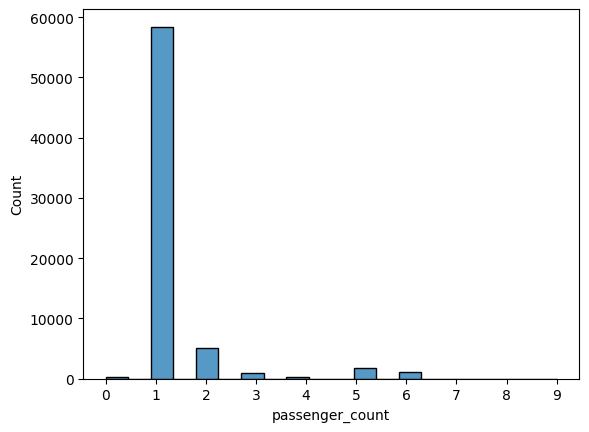

In [162]:
sns.histplot(df_trip['passenger_count'], bins=20)
plt.xticks(range(10))
plt.yticks()
plt.show()

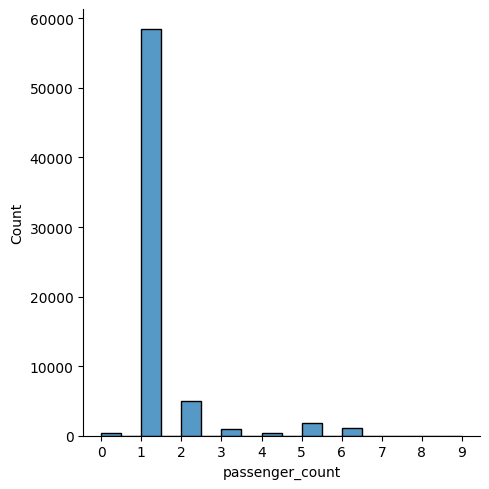

In [163]:
sns.displot(df_trip['passenger_count'])
plt.xticks(range(10))
plt.yticks()
plt.show()

In [164]:
df_trip['passenger_count'].mode() # hasil menunjukan column 'passenger_count' bersifat non-parametric dan modus dari tabel tersebut adalah '1' passenger.

0    1.0
Name: passenger_count, dtype: float64

In [165]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

In [166]:
# Untuk column 'passenger_count' dengan value NA akan diisi dengan angka '1'. 
# Kesimpulan ini diambil dari modus kolom tersebut yaitu angka '1'.
df_trip['passenger_count'].fillna(1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13736\4094454451.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trip['passenger_count'].fillna(1, inplace=True)


In [167]:
df_trip['passenger_count'].isna().sum() # konfirmasi tidak ada value NA pada kolom 'passenger_count'

np.int64(0)

### Normality Test lain yang digunakan untuk mengevaluasi distribusi

Interpretasi pvalue

- pvalue > 0.05 artinya kita mengasumsikan data terdistribusi normal
- pvalue <= 0.05 artinya kita mengasumsika data TIDAK terdistribusi normal

In [168]:
# 1. Kolmogorov Smirnov Test
from scipy.stats import kstest


In [169]:

kstest(df_trip['passenger_count'],'norm')

KstestResult(statistic=np.float64(0.8364147955152111), pvalue=np.float64(0.0), statistic_location=np.float64(1.0), statistic_sign=np.int8(-1))

In [170]:
stat,pvalue = kstest(df_trip['passenger_count'],'norm')
if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, pvalue > 0.05. Artinya kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, pvalue <= 0.05. Artinya kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, pvalue <= 0.05. Artinya kita mengasumsikan data TIDAK terdistribusi normal


In [171]:
# 2. Lilliefors Test
from statsmodels.stats.diagnostic import lilliefors

In [172]:
lilliefors(df_trip['passenger_count'])

(np.float64(0.48670688372589493), np.float64(0.0009999999999998899))

In [173]:
stat,pvalue = lilliefors(df_trip['passenger_count'])
if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, pvalue > 0.05. Artinya kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, pvalue <= 0.05. Artinya kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00100, pvalue <= 0.05. Artinya kita mengasumsikan data TIDAK terdistribusi normal


In [174]:
# 3. Shapiro Wilk Test
from scipy.stats import shapiro

In [175]:
shapiro(df_trip['passenger_count'])

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 67952.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.37114700788816846), pvalue=np.float64(1.1787373201712548e-157))

In [176]:
stat,pvalue = shapiro(df_trip['passenger_count'])
if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, pvalue > 0.05. Artinya kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, pvalue <= 0.05. Artinya kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, pvalue <= 0.05. Artinya kita mengasumsikan data TIDAK terdistribusi normal


In [177]:
# 4. D'Agostino & Pearson Test
from scipy.stats import normaltest as normalt

In [178]:
normalt(df_trip['passenger_count'])

NormaltestResult(statistic=np.float64(50196.378564558676), pvalue=np.float64(0.0))

In [179]:
stat,pvalue = normalt(df_trip['passenger_count'])
if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, pvalue > 0.05. Artinya kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, pvalue <= 0.05. Artinya kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, pvalue <= 0.05. Artinya kita mengasumsikan data TIDAK terdistribusi normal


4. Kolom: payment_type

In [180]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

In [181]:
df_trip['payment_type'].isna().sum() # Hasil menunjukkan terdapat 4324 baris dengan Null Values.

np.int64(0)

In [182]:
# Pada kolom 'payment_type' diisi value 5 yang menandakan 'Unknown' payment type.
df_trip['payment_type'].fillna(5, inplace=True) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13736\1703213778.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trip['payment_type'].fillna(5, inplace=True)


In [183]:
df_trip['payment_type'].isna().sum() # Hasil menunjukan sudah tidak terdapat Null values pada kolom tersebut.

np.int64(0)

5. Kolom: trip_type

In [184]:
### Pada kolom trip_type akan dianalisa menggunakan unique value, histplot untuk melihat apakah data terdistribusi normal.

df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

In [185]:
df_trip['trip_type'].unique()

array([1., 2.])

<Axes: xlabel='trip_type', ylabel='Count'>

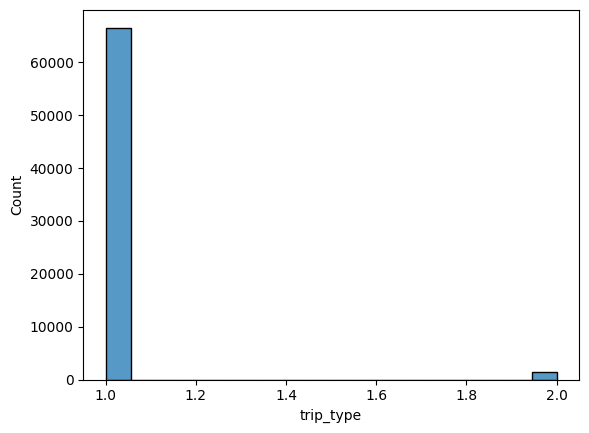

In [186]:
sns.histplot(df_trip['trip_type']) # Hasil Histogram menunjukan sebagian besar trip adalah Street-hail type.

In [187]:
df_trip['trip_type'].mode() # Modus = 1.0

0    1.0
Name: trip_type, dtype: float64

In [188]:
df_trip['trip_type'].isna().sum()

np.int64(0)

In [189]:
# Pada kolom 'trip_type' diisi value 1 yang menandakan 'Street-hail' trip_type.
# Kesimpulan ini berdasarkan modus yang didapat dari kolom tersebut adalah 1.0
df_trip['trip_type'].fillna(1, inplace=True) 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13736\1226110384.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trip['trip_type'].fillna(1, inplace=True)


In [190]:
df_trip['trip_type'].isna().sum() # Hasil menunjukan sudah tidak adanya Null values pada kolom tersebut.

np.int64(0)

6. Kolom: congestion_surcharge

In [191]:
### Pada kolom congestion_charge akan dianalisa menggunakan histplot untuk melihat apakah data terdistribusi normal.

df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

In [192]:
df_trip['congestion_surcharge'].unique()

array([2.75, 0.  , 2.5 ])

<Axes: xlabel='congestion_surcharge', ylabel='Count'>

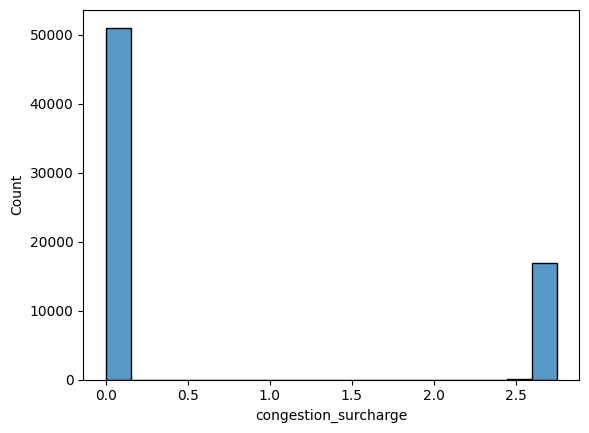

In [193]:
# Hasil historgram terlihat sebagian besar trip memiliki 0 surcharge. 

sns.histplot(df_trip['congestion_surcharge']) 

In [194]:
df_trip['congestion_surcharge'].mode() # Modus = 0

0    0.0
Name: congestion_surcharge, dtype: float64

In [195]:
df_trip['congestion_surcharge'].isna().sum()

np.int64(0)

In [196]:
# Pada kolom 'congestion_surcharge' diisi value 0 yang menandakan tidak ada surcharge ($0.0)
# Kesimpulan ini berdasarkan modus yang didapat dari kolom tersebut adalah 0.0

df_trip['congestion_surcharge'].fillna(0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13736\3948204749.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trip['congestion_surcharge'].fillna(0, inplace=True)


In [197]:
df_trip['congestion_surcharge'].isna().sum() # Tidak ada NULL value dalam kolom 'congestion_surcharge'

np.int64(0)

### Data Cleaning (Standardize and Cleaning Data) 
- Format data pada kolom lpep_pickup_datetime dan lpep_dropoff_datetime akan diganti dari object ke datetime agar dapat ditabulasi trip_length (berapa lamanya trip dalam ukuran seconds)
- Kolom trip_length dan trip_length_seconds tersebut akan ditambahkan ke dataframe df_trip.
- Akan di analisa lebih dalam kolom-kolom yang terdapat values negatif antara lain: fare_amount, extra, mta_tax, tip_amount, improvement_surcharge yang di asumsikan karena trip yang yang dicancel sehingga terdapat refund. Untuk meminimalisasi skewed data pada analisis, data tersebut akan di hapus.
- Setelah analisa didapatkan kalau terdapat 259 baris dari 68211 (0,38%) yang berisi values negatif. Karena data tersebut relatif kecil dari kelesuruhan data maka data tersebut aman untuk didelete. 

In [198]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

In [199]:
df_trip['lpep_pickup_datetime'] = pd.to_datetime(df_trip['lpep_pickup_datetime'])

In [200]:
df_trip['lpep_dropoff_datetime'] = pd.to_datetime(df_trip['lpep_dropoff_datetime'])

In [201]:
df_trip['trip_length'] = df_trip['lpep_dropoff_datetime']  - df_trip['lpep_pickup_datetime']

In [202]:
df_trip['trip_length_seconds'] = df_trip['trip_length'].dt.total_seconds()


In [203]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

In [204]:
df_trip.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,0.0,NaN,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01,661.0,16.666667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,0.0,NaN,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46,406.0,16.666667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,0.0,NaN,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20,380.0,16.666667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,0.0,NaN,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49,349.0,16.666667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,0.0,NaN,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58,358.0,0.000000


In [205]:
df_trip.describe() # Hasil deskriptif analisis menunjukkan fare_amount ada nilai negatif. 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage
count,67952.000000,67952,67952,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,...,67952.000000,0.0,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952,67952.000000,67952.000000
mean,1.862889,2023-01-16 20:15:01.148207360,2023-01-16 20:33:04.986843392,7.337282,98.440826,138.466359,1.295797,8.142598,16.684503,0.830778,...,0.170177,NaN,0.957613,21.894062,1.599408,1.020235,0.683354,0 days 00:18:03.838636096,1083.838636,8.989524
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000,...,0.000000,NaN,0.000000,0.800000,1.000000,1.000000,0.000000,0 days 00:00:00,0.000000,0.000000
25%,2.000000,2023-01-09 12:08:00.750000128,2023-01-09 12:26:52,1.000000,74.000000,74.000000,1.000000,1.120000,9.300000,0.000000,...,0.000000,NaN,1.000000,12.950000,1.000000,1.000000,0.000000,0 days 00:07:15,435.000000,0.000000
50%,2.000000,2023-01-17 08:44:17.500000,2023-01-17 08:59:16.500000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,...,0.000000,NaN,1.000000,17.940000,1.000000,1.000000,0.000000,0 days 00:11:25,685.000000,9.090909
75%,2.000000,2023-01-24 15:50:10,2023-01-24 16:05:49.500000,1.000000,129.000000,220.000000,1.000000,3.220000,19.800000,1.000000,...,0.000000,NaN,1.000000,26.200000,2.000000,1.000000,0.000000,0 days 00:17:31,1051.000000,16.666667
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,...,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000,0 days 23:58:56,86336.000000,95.693780
std,0.343968,NaN,NaN,23.917603,61.174666,76.757426,0.951259,586.219761,13.418972,1.267974,...,1.101562,NaN,0.168393,15.379032,1.009152,0.140804,1.188328,0 days 01:14:15.774926606,4455.774927,8.859288


In [206]:
df_trip = df_trip.drop(df_trip[df_trip['fare_amount'] <= 0].index) # Mengeliminasi data fare_amount yang negatif.
df_trip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.0,NaN,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01,661.0,16.666667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.0,NaN,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46,406.0,16.666667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.0,NaN,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20,380.0,16.666667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.0,NaN,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49,349.0,16.666667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.0,NaN,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58,358.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,...,0.0,NaN,1.0,16.70,5.0,1.0,0.00,0 days 00:13:00,780.0,0.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,...,0.0,NaN,1.0,5.41,5.0,1.0,0.00,0 days 00:08:00,480.0,0.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,...,0.0,NaN,1.0,21.04,5.0,1.0,0.00,0 days 00:16:00,960.0,16.682510
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,...,0.0,NaN,1.0,19.18,5.0,1.0,0.00,0 days 00:18:00,1080.0,16.684046


In [207]:
df_trip.describe(include='all') 

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage
count,67952.000000,67952,67952,67952,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,...,67952.000000,0.0,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952,67952.000000,67952.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,67645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.862889,2023-01-16 20:15:01.148207360,2023-01-16 20:33:04.986843392,NaN,7.337282,98.440826,138.466359,1.295797,8.142598,16.684503,...,0.170177,NaN,0.957613,21.894062,1.599408,1.020235,0.683354,0 days 00:18:03.838636096,1083.838636,8.989524
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,...,0.000000,NaN,0.000000,0.800000,1.000000,1.000000,0.000000,0 days 00:00:00,0.000000,0.000000
25%,2.000000,2023-01-09 12:08:00.750000128,2023-01-09 12:26:52,NaN,1.000000,74.000000,74.000000,1.000000,1.120000,9.300000,...,0.000000,NaN,1.000000,12.950000,1.000000,1.000000,0.000000,0 days 00:07:15,435.000000,0.000000
50%,2.000000,2023-01-17 08:44:17.500000,2023-01-17 08:59:16.500000,NaN,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,...,0.000000,NaN,1.000000,17.940000,1.000000,1.000000,0.000000,0 days 00:11:25,685.000000,9.090909
75%,2.000000,2023-01-24 15:50:10,2023-01-24 16:05:49.500000,NaN,1.000000,129.000000,220.000000,1.000000,3.220000,19.800000,...,0.000000,NaN,1.000000,26.200000,2.000000,1.000000,0.000000,0 days 00:17:31,1051.000000,16.666667
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,NaN,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,...,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000,0 days 23:58:56,86336.000000,95.693780


In [208]:
# (Barisan berkurang dari 68211 -> 67952) =  259 baris data dari 68211 baris (kurang lebih 0.38% data ter-delete)

df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

### Data Analysis
- Untuk proses data analysis, akan ditambahkan kolom 'tip_percentage' (df_trip['tip_amount'] / df_trip['total_amount'] * 100) yang akan dimasukkan ke dataframe df_trip.
- dataframe df_trip akan dilakukan inner join dengan df_zone untuk menunjukan nama daerah yang lebih jelas pada kolom PULocationID (pickup locationID) dan DOLocationID (drop-off locationID). Hasil merge tersebut akan dimasukkan ke dataframe baru yaitu: df_trip_merge.
- Akan dilakukan data correlation dengen menggunakan metode spearman karena data tidak terdistribusi normal.
- Analisa akan menjawab permasalahan sebagai berikut:
    1. Apakah tip_percentage yang didapatkan tergantung pada trip_distance, trip_lengths, passenger_count, total_amount?
    2. Daerah-daerah mana saja (melalui Borough dan Zone) yang berpotensi mendapatkan total_amount, trip_lengths, trip_distance tertinggi?
    3. Melalui tableau akan dianalisa dari segi melihat time analysis (pukul berapa, hari-hari apa saja) untuk pickup dan dropoff yang berpotensi mendapatkan tips_percentage tertinggi.


In [209]:
df_trip['tip_percentage'] = df_trip['tip_amount'] / df_trip['total_amount'] * 100

In [210]:
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67952 entries, 0 to 68210
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64     

In [211]:
df_trip.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage
count,67952.000000,67952,67952,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,...,67952.000000,0.0,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952,67952.000000,67952.000000
mean,1.862889,2023-01-16 20:15:01.148207360,2023-01-16 20:33:04.986843392,7.337282,98.440826,138.466359,1.295797,8.142598,16.684503,0.830778,...,0.170177,NaN,0.957613,21.894062,1.599408,1.020235,0.683354,0 days 00:18:03.838636096,1083.838636,8.989524
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000,...,0.000000,NaN,0.000000,0.800000,1.000000,1.000000,0.000000,0 days 00:00:00,0.000000,0.000000
25%,2.000000,2023-01-09 12:08:00.750000128,2023-01-09 12:26:52,1.000000,74.000000,74.000000,1.000000,1.120000,9.300000,0.000000,...,0.000000,NaN,1.000000,12.950000,1.000000,1.000000,0.000000,0 days 00:07:15,435.000000,0.000000
50%,2.000000,2023-01-17 08:44:17.500000,2023-01-17 08:59:16.500000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,...,0.000000,NaN,1.000000,17.940000,1.000000,1.000000,0.000000,0 days 00:11:25,685.000000,9.090909
75%,2.000000,2023-01-24 15:50:10,2023-01-24 16:05:49.500000,1.000000,129.000000,220.000000,1.000000,3.220000,19.800000,1.000000,...,0.000000,NaN,1.000000,26.200000,2.000000,1.000000,0.000000,0 days 00:17:31,1051.000000,16.666667
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,...,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000,0 days 23:58:56,86336.000000,95.693780
std,0.343968,NaN,NaN,23.917603,61.174666,76.757426,0.951259,586.219761,13.418972,1.267974,...,1.101562,NaN,0.168393,15.379032,1.009152,0.140804,1.188328,0 days 01:14:15.774926606,4455.774927,8.859288


### Inner Join trip-DataFrame dan zone-DataFrame pada LocationID

In [212]:
df_trip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,0.0,NaN,1.0,24.18,1.0,1.0,2.75,0 days 00:11:01,661.0,16.666667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.0,NaN,1.0,15.84,1.0,1.0,0.00,0 days 00:06:46,406.0,16.666667
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.0,NaN,1.0,11.64,1.0,1.0,0.00,0 days 00:06:20,380.0,16.666667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.0,NaN,1.0,10.20,1.0,1.0,0.00,0 days 00:05:49,349.0,16.666667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.0,NaN,1.0,8.00,1.0,1.0,0.00,0 days 00:05:58,358.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,...,0.0,NaN,1.0,16.70,5.0,1.0,0.00,0 days 00:13:00,780.0,0.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,...,0.0,NaN,1.0,5.41,5.0,1.0,0.00,0 days 00:08:00,480.0,0.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,...,0.0,NaN,1.0,21.04,5.0,1.0,0.00,0 days 00:16:00,960.0,16.682510
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,...,0.0,NaN,1.0,19.18,5.0,1.0,0.00,0 days 00:18:00,1080.0,16.684046


In [213]:
df_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,Outside of NYC,NaN


In [214]:
df_trip_merge_pu = pd.merge(df_trip,df_zone[['LocationID','Borough','Zone']], left_on = 'PULocationID', right_on = 'LocationID')
df_trip_merge_pu


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage,LocationID,Borough,Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,0 days 00:11:01,661.0,16.666667,166,Manhattan,Morningside Heights
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,0 days 00:06:46,406.0,16.666667,24,Manhattan,Bloomingdale
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,11.64,1.0,1.0,0.00,0 days 00:06:20,380.0,16.666667,223,Queens,Steinway
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,0 days 00:05:49,349.0,16.666667,41,Manhattan,Central Harlem
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,0 days 00:05:58,358.0,0.000000,41,Manhattan,Central Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67947,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,...,16.70,5.0,1.0,0.00,0 days 00:13:00,780.0,0.000000,49,Brooklyn,Clinton Hill
67948,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,...,5.41,5.0,1.0,0.00,0 days 00:08:00,480.0,0.000000,10,Queens,Baisley Park
67949,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,...,21.04,5.0,1.0,0.00,0 days 00:16:00,960.0,16.682510,66,Brooklyn,DUMBO/Vinegar Hill
67950,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,...,19.18,5.0,1.0,0.00,0 days 00:18:00,1080.0,16.684046,225,Brooklyn,Stuyvesant Heights


In [215]:
# Rename merge dataframe untuk Pickup location

df_trip_merge_pu = df_trip_merge_pu.rename(columns = {'LocationID' : 'PULocationID', 'Borough' : 'PUBorough', 'Zone' : 'PUZone'})
df_trip_merge_pu



,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage,PULocationID,PUBorough,PUZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,24.18,1.0,1.0,2.75,0 days 00:11:01,661.0,16.666667,166,Manhattan,Morningside Heights
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,15.84,1.0,1.0,0.00,0 days 00:06:46,406.0,16.666667,24,Manhattan,Bloomingdale
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,11.64,1.0,1.0,0.00,0 days 00:06:20,380.0,16.666667,223,Queens,Steinway
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,10.20,1.0,1.0,0.00,0 days 00:05:49,349.0,16.666667,41,Manhattan,Central Harlem
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,8.00,1.0,1.0,0.00,0 days 00:05:58,358.0,0.000000,41,Manhattan,Central Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67947,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,...,16.70,5.0,1.0,0.00,0 days 00:13:00,780.0,0.000000,49,Brooklyn,Clinton Hill
67948,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,...,5.41,5.0,1.0,0.00,0 days 00:08:00,480.0,0.000000,10,Queens,Baisley Park
67949,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,...,21.04,5.0,1.0,0.00,0 days 00:16:00,960.0,16.682510,66,Brooklyn,DUMBO/Vinegar Hill
67950,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,...,19.18,5.0,1.0,0.00,0 days 00:18:00,1080.0,16.684046,225,Brooklyn,Stuyvesant Heights


In [216]:
# Melakukan inner join to mengetahui DropOff Location
df_trip_merge = pd.merge(df_trip_merge_pu,df_zone[['LocationID','Borough','Zone']], left_on = 'DOLocationID', right_on = 'LocationID') 
df_trip_merge

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage,PULocationID,PUBorough,PUZone,LocationID,Borough,Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,2.75,0 days 00:11:01,661.0,16.666667,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.00,0 days 00:06:46,406.0,16.666667,24,Manhattan,Bloomingdale,43,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.00,0 days 00:06:20,380.0,16.666667,223,Queens,Steinway,179,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.00,0 days 00:05:49,349.0,16.666667,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,0 days 00:05:58,358.0,0.000000,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67947,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,...,0.00,0 days 00:13:00,780.0,0.000000,49,Brooklyn,Clinton Hill,62,Brooklyn,Crown Heights South
67948,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,...,0.00,0 days 00:08:00,480.0,0.000000,10,Queens,Baisley Park,205,Queens,Saint Albans
67949,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,...,0.00,0 days 00:16:00,960.0,16.682510,66,Brooklyn,DUMBO/Vinegar Hill,37,Brooklyn,Bushwick South
67950,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,...,0.00,0 days 00:18:00,1080.0,16.684046,225,Brooklyn,Stuyvesant Heights,189,Brooklyn,Prospect Heights


In [217]:
# Rename merge dataframe untuk Drop-off location

df_trip_merge = df_trip_merge.rename(columns = {'LocationID' : 'DOLocationID', 'Borough' : 'DOBorough', 'Zone' : 'DOZone'})
df_trip_merge


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,DOZone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,2.75,0 days 00:11:01,661.0,16.666667,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,0.00,0 days 00:06:46,406.0,16.666667,24,Manhattan,Bloomingdale,43,Manhattan,Central Park
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,...,0.00,0 days 00:06:20,380.0,16.666667,223,Queens,Steinway,179,Queens,Old Astoria
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,0.00,0 days 00:05:49,349.0,16.666667,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,0 days 00:05:58,358.0,0.000000,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67947,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,99.0,49,62,1.0,4070.82,15.70,...,0.00,0 days 00:13:00,780.0,0.000000,49,Brooklyn,Clinton Hill,62,Brooklyn,Crown Heights South
67948,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,99.0,10,205,1.0,2.14,4.41,...,0.00,0 days 00:08:00,480.0,0.000000,10,Queens,Baisley Park,205,Queens,Saint Albans
67949,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,99.0,66,37,1.0,3.44,16.53,...,0.00,0 days 00:16:00,960.0,16.682510,66,Brooklyn,DUMBO/Vinegar Hill,37,Brooklyn,Bushwick South
67950,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,99.0,225,189,1.0,3.03,14.98,...,0.00,0 days 00:18:00,1080.0,16.684046,225,Brooklyn,Stuyvesant Heights,189,Brooklyn,Prospect Heights


In [218]:
pd.set_option('display.max_info_columns', 200)

In [219]:

df_trip_merge.info() # Hasil merge antara df_trip dan df_zone tidak menunjukkan adanya null values selain ehail_fee yang tidak akan dipakai.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67952 entries, 0 to 67951
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64

In [220]:
df_trip_merge.corr(numeric_only=True)

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_length_seconds,tip_percentage,PULocationID,DOLocationID
VendorID,1.000000,0.080929,-0.011927,-0.001604,0.076503,0.004021,0.007801,-0.135784,-0.917789,0.063945,...,NaN,-0.075873,0.021349,0.073248,0.044220,-0.002554,0.013266,0.060333,-0.011927,-0.001604
RatecodeID,0.080929,1.000000,0.053440,0.006820,-0.081101,0.036352,0.156031,-0.170153,-0.396623,0.123296,...,NaN,0.044205,0.150429,0.875974,-0.014157,-0.151687,0.006711,0.064768,0.053440,0.006820
PULocationID,-0.011927,0.053440,1.000000,0.086147,0.006673,0.001145,0.105053,0.010040,-0.019172,0.024620,...,NaN,0.018741,0.094258,0.061949,0.061322,-0.082383,0.010589,-0.032705,1.000000,0.086147
DOLocationID,-0.001604,0.006820,0.086147,1.000000,0.001353,0.000812,0.085678,0.066330,-0.007479,0.117635,...,NaN,-0.014613,0.131192,-0.042848,0.029146,0.402539,0.017699,0.094601,0.086147,1.000000
passenger_count,0.076503,-0.081101,0.006673,0.001353,1.000000,-0.002867,0.000447,0.008106,-0.042040,0.015006,...,NaN,0.029921,0.007127,-0.078600,0.002008,0.035197,-0.009195,0.012258,0.006673,0.001353
trip_distance,0.004021,0.036352,0.001145,0.000812,-0.002867,1.000000,0.012830,-0.005848,-0.014972,0.003202,...,NaN,-0.002388,0.011697,0.031889,-0.001387,-0.004520,0.000897,-0.000091,0.001145,0.000812
fare_amount,0.007801,0.156031,0.105053,0.085678,0.000447,0.012830,1.000000,-0.010326,-0.089937,0.313245,...,NaN,0.024418,0.967606,0.115496,0.150982,0.116166,0.115905,-0.035958,0.105053,0.085678
extra,-0.135784,-0.170153,0.010040,0.066330,0.008106,-0.005848,-0.010326,1.000000,0.193259,0.099766,...,NaN,0.048484,0.093676,-0.182014,-0.079240,0.111793,-0.008801,0.063000,0.010040,0.066330
mta_tax,-0.917789,-0.396623,-0.019172,-0.007479,-0.042040,-0.014972,-0.089937,0.193259,1.000000,-0.098436,...,NaN,0.092702,-0.093614,-0.344259,-0.220363,0.064352,-0.014726,-0.064924,-0.019172,-0.007479
tip_amount,0.063945,0.123296,0.024620,0.117635,0.015006,0.003202,0.313245,0.099766,-0.098436,1.000000,...,NaN,0.008359,0.511787,-0.121482,0.011889,0.231431,0.025378,0.722271,0.024620,0.117635


In [221]:
# Pakai method='spearman' karena kolom data rata2 tidak ter-Distribusi Normal
df_trip_merge_corr = df_trip_merge.corr(method='spearman', numeric_only=True) 
df_trip_merge_corr

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_length_seconds,tip_percentage,PULocationID,DOLocationID
VendorID,1.000000,0.091810,0.022481,-0.000766,0.057403,0.090334,0.013272,-0.113035,-0.805024,0.078306,...,NaN,-0.081789,0.020376,0.053459,0.044220,-0.002589,-0.040102,0.096319,0.022481,-0.000766
RatecodeID,0.091810,1.000000,0.038550,0.022209,-0.072789,0.108383,0.242367,-0.233127,-0.643120,0.122628,...,NaN,0.000684,0.198233,0.403687,0.426003,-0.166190,0.093463,0.051917,0.038550,0.022209
PULocationID,0.022481,0.038550,1.000000,0.069064,0.020813,0.064180,0.086870,0.051550,-0.039750,-0.035708,...,NaN,0.015591,0.063411,0.054001,0.054466,-0.116407,0.042357,-0.046931,1.000000,0.069064
DOLocationID,-0.000766,0.022209,0.069064,1.000000,0.001608,0.184760,0.177558,0.060463,-0.012417,0.160495,...,NaN,-0.012093,0.249869,-0.082509,0.030836,0.393106,0.154946,0.091400,0.069064,1.000000
passenger_count,0.057403,-0.072789,0.020813,0.001608,1.000000,0.017556,0.007213,0.035400,-0.000254,0.007816,...,NaN,0.028065,0.014405,-0.048312,0.019780,0.030443,0.003662,0.005717,0.020813,0.001608
trip_distance,0.090334,0.108383,0.064180,0.184760,0.017556,1.000000,0.816701,0.066347,-0.123056,0.317384,...,NaN,0.010374,0.799416,0.028663,-0.084534,0.290564,0.769000,0.089525,0.064180,0.184760
fare_amount,0.013272,0.242367,0.086870,0.177558,0.007213,0.816701,1.000000,-0.033095,-0.145060,0.271680,...,NaN,0.044531,0.947489,0.020869,0.085201,0.236034,0.891247,0.018314,0.086870,0.177558
extra,-0.113035,-0.233127,0.051550,0.060463,0.035400,0.066347,-0.033095,1.000000,0.222577,0.091492,...,NaN,0.030339,0.114242,-0.150158,-0.103604,0.114647,-0.022905,0.050759,0.051550,0.060463
mta_tax,-0.805024,-0.643120,-0.039750,-0.012417,-0.000254,-0.123056,-0.145060,0.222577,1.000000,-0.126710,...,NaN,0.079221,-0.123443,-0.274406,-0.314273,0.097420,-0.015746,-0.101742,-0.039750,-0.012417
tip_amount,0.078306,0.122628,-0.035708,0.160495,0.007816,0.317384,0.271680,0.091492,-0.126710,1.000000,...,NaN,0.002090,0.465484,-0.561621,-0.024069,0.308000,0.241807,0.902309,-0.035708,0.160495


In [222]:
df_trip_merge.describe(include='all')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,congestion_surcharge,trip_length,trip_length_seconds,tip_percentage,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,DOZone
count,67952.000000,67952,67952,67952,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,67952.000000,...,67952.000000,67952,67952.000000,67952.000000,67952.000000,67952,67952,67952.000000,67952,67952
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7,224,NaN,7,247
top,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Manhattan,East Harlem North,NaN,Manhattan,East Harlem South
freq,NaN,NaN,NaN,67645,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,39359,13243,NaN,39545,3504
mean,1.862889,2023-01-16 20:15:01.148207360,2023-01-16 20:33:04.986843392,NaN,7.337282,98.440826,138.466359,1.295797,8.142598,16.684503,...,0.683354,0 days 00:18:03.838636096,1083.838636,8.989524,98.440826,NaN,NaN,138.466359,NaN,NaN
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,0.010000,...,0.000000,0 days 00:00:00,0.000000,0.000000,1.000000,NaN,NaN,1.000000,NaN,NaN
25%,2.000000,2023-01-09 12:08:00.750000128,2023-01-09 12:26:52,NaN,1.000000,74.000000,74.000000,1.000000,1.120000,9.300000,...,0.000000,0 days 00:07:15,435.000000,0.000000,74.000000,NaN,NaN,74.000000,NaN,NaN
50%,2.000000,2023-01-17 08:44:17.500000,2023-01-17 08:59:16.500000,NaN,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,...,0.000000,0 days 00:11:25,685.000000,9.090909,75.000000,NaN,NaN,138.000000,NaN,NaN
75%,2.000000,2023-01-24 15:50:10,2023-01-24 16:05:49.500000,NaN,1.000000,129.000000,220.000000,1.000000,3.220000,19.800000,...,0.000000,0 days 00:17:31,1051.000000,16.666667,129.000000,NaN,NaN,220.000000,NaN,NaN
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,NaN,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,...,2.750000,0 days 23:58:56,86336.000000,95.693780,265.000000,NaN,NaN,265.000000,NaN,NaN


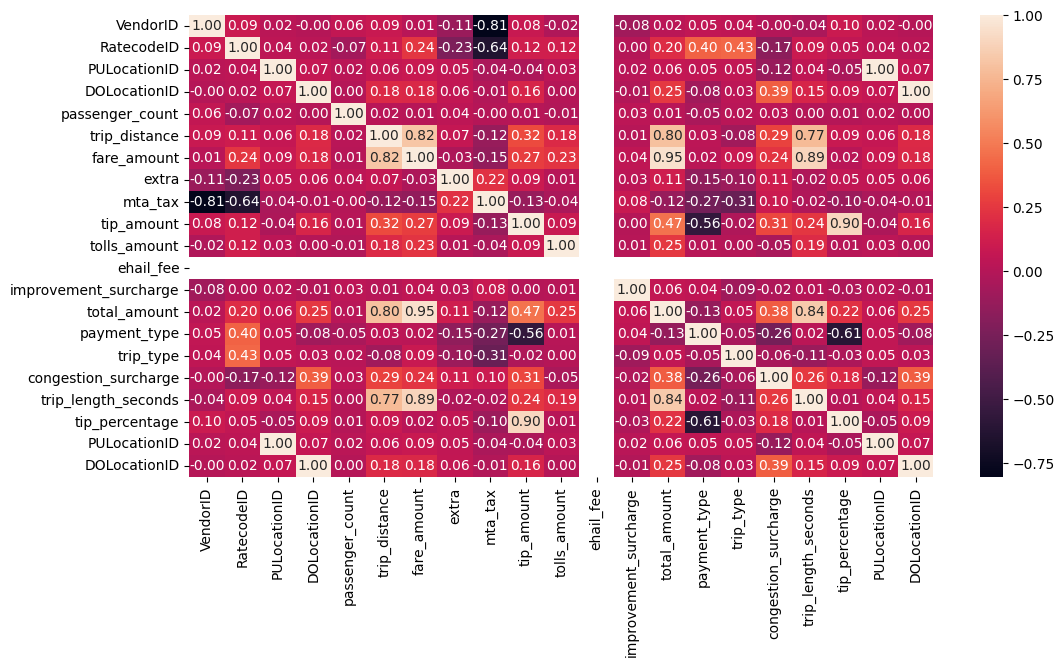

In [223]:
# Dapat dilihat dari HeatMap chart di bawah tabel korelasi antar kolom.
# Untuk Data Analisis, akan difokuskan pada kolom tip_percentage.
# Akan dilakukan analisa lebih dalam antara tip_percentage vs tip_amount, total_amount, fare_amount, trip_type, trip_distance, trip_length_seconds, dan passenger_count

plt.figure(figsize=(12,6))
sns.heatmap(df_trip_merge_corr, annot=True, fmt='.2f')
plt.show()

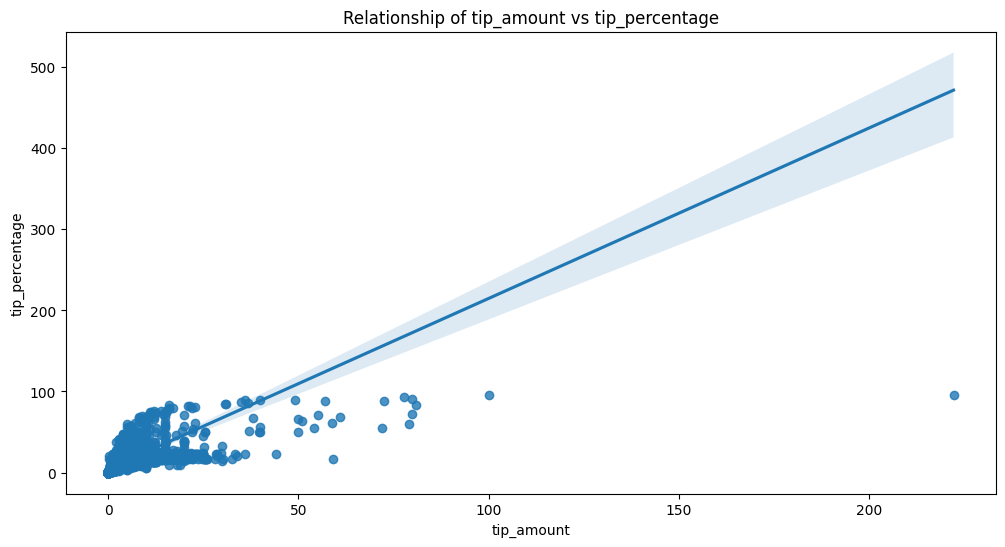

In [224]:
# Hasil regplot menunjukkan korelasi positive 0.90 antara tip_amount dan tip_percentage
plt.figure(figsize=(12,6))
sns.regplot(data=df_trip_merge, x='tip_amount', y='tip_percentage')
plt.title('Relationship of tip_amount vs tip_percentage')

plt.show()

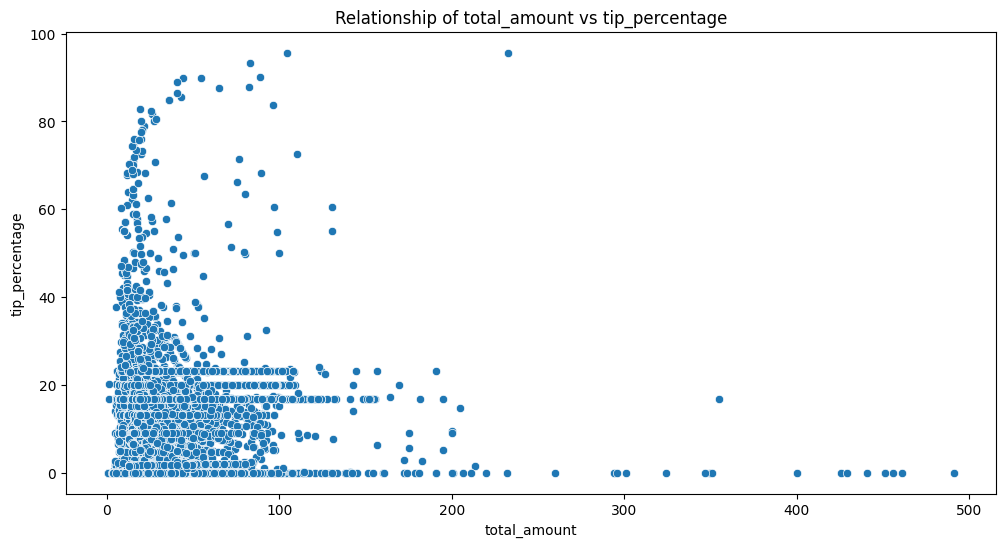

In [225]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_trip_merge, x='total_amount', y='tip_percentage')
plt.title('Relationship of total_amount vs tip_percentage')

plt.show()

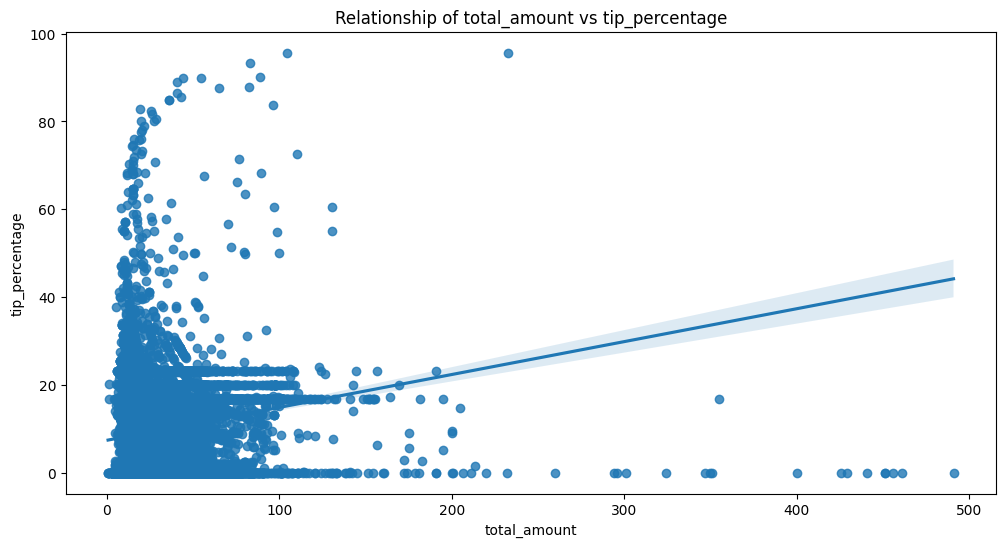

In [226]:
# Hasil regplot menunjukkan korelasi positive 0.22 antara fare_amount dan tip_percentage

plt.figure(figsize=(12,6))
sns.regplot(data=df_trip_merge, x='total_amount', y='tip_percentage')
plt.title('Relationship of total_amount vs tip_percentage')

plt.show()

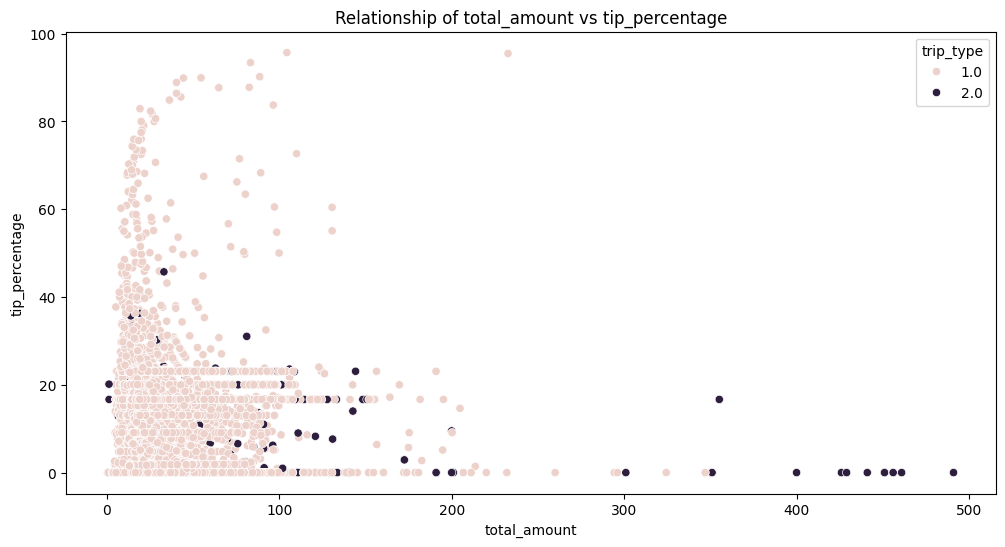

In [227]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_trip_merge, x='total_amount', y='tip_percentage', hue='trip_type')
plt.title('Relationship of total_amount vs tip_percentage')

plt.show()

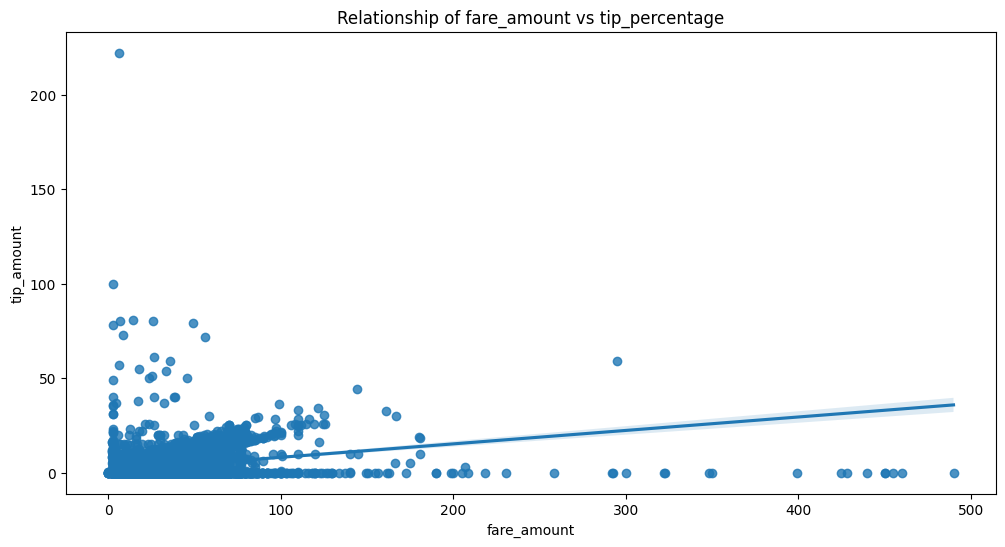

In [228]:
plt.figure(figsize=(12,6))
sns.regplot(data=df_trip_merge, x='fare_amount', y='tip_amount')
plt.title('Relationship of fare_amount vs tip_percentage')

plt.show()

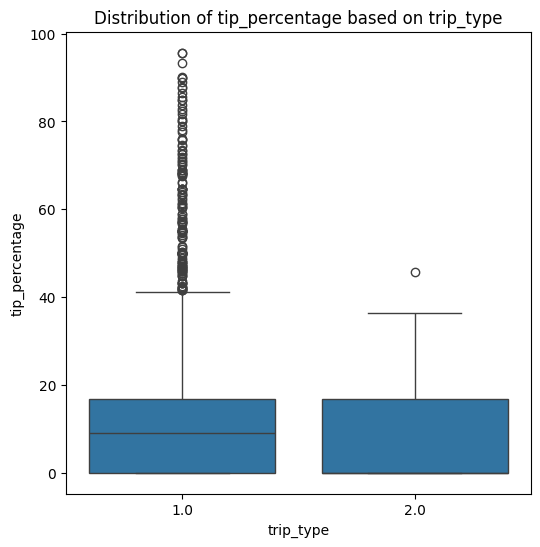

In [229]:
# Hasil boxplot untuk distribution of tip_percentage based on trip_type menunjukan:
# Trip type 1.0 (Street-Hail) mempunyai lebih banyak outliers positif.
# Dengan adanya outliers tersebut, hasil menunjukkan jumlah penumpang cenderung memberikan tips lebih dengan maximal 95.6%
# Min pemberian tips 0%, Q1 = 0%, Median = 9.09%, Q3 = 16.6%, Q4 = 95.6%

# Trip type 2.0 (Dispatch) mempunyai lebih sedikit outliers.
# Dengan sedikitnya outliers tersebut, hasil menunjukkan jumlah penumpang Dispatch cenderung tidak memberikan tips banyak dengan maximal hanya 45.7%.
# Min pemberian tips 0%, Q1 = 0%, Median = 0%, Q3 = 16.6%, Q4 = 45.7%


plt.figure(figsize=(6,6))
sns.boxplot(data=df_trip_merge, y='tip_percentage', x='trip_type') 
plt.title('Distribution of tip_percentage based on trip_type')

plt.show()

In [230]:
df_trip_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67952 entries, 0 to 67951
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               67952 non-null  int64          
 1   lpep_pickup_datetime   67952 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  67952 non-null  datetime64[ns] 
 3   store_and_fwd_flag     67952 non-null  object         
 4   RatecodeID             67952 non-null  float64        
 5   PULocationID           67952 non-null  int64          
 6   DOLocationID           67952 non-null  int64          
 7   passenger_count        67952 non-null  float64        
 8   trip_distance          67952 non-null  float64        
 9   fare_amount            67952 non-null  float64        
 10  extra                  67952 non-null  float64        
 11  mta_tax                67952 non-null  float64        
 12  tip_amount             67952 non-null  float64

In [231]:
df_trip_merge_trip_type1 = df_trip_merge[df_trip_merge['trip_type'] == 1.0]
df_trip_merge_trip_type2 = df_trip_merge[df_trip_merge['trip_type'] == 2.0]


In [232]:
df_trip_merge_trip_type1['tip_percentage'].describe()

count    66577.000000
mean         9.040450
std          8.858009
min          0.000000
25%          0.000000
50%          9.090909
75%         16.666667
max         95.693780
Name: tip_percentage, dtype: float64

In [233]:
df_trip_merge_trip_type2['tip_percentage'].describe()

count    1375.000000
mean        6.523734
std         8.569267
min         0.000000
25%         0.000000
50%         0.000000
75%        16.666667
max        45.734097
Name: tip_percentage, dtype: float64

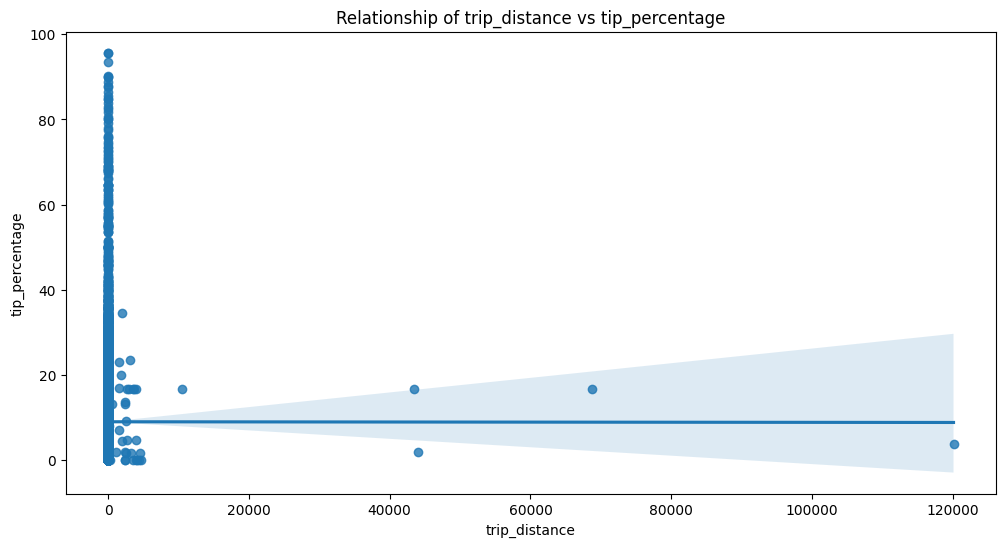

In [234]:
# Hasil regplot menunjukkan sedikit korelasi antara trip_distance dan tip_percentage.

plt.figure(figsize=(12,6))
sns.regplot(data=df_trip_merge, x='trip_distance', y='tip_percentage')
plt.title('Relationship of trip_distance vs tip_percentage')

plt.show()

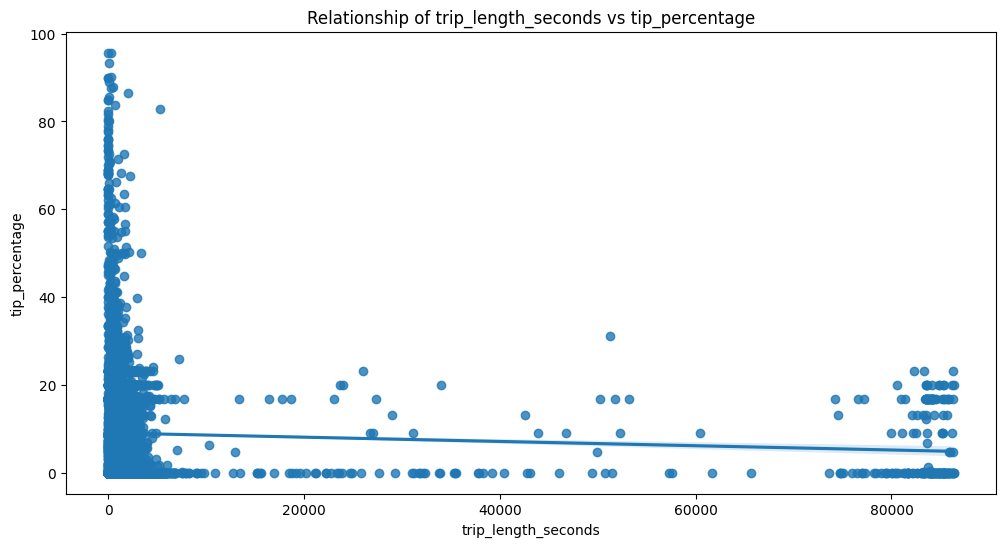

In [235]:
# Hasil regplot menunjukkan sedikit korelasi negatif antara trip_length_seconds (jangka waktu dalam detik) dan tip_percentage.

plt.figure(figsize=(12,6))
sns.regplot(data=df_trip_merge, x='trip_length_seconds', y='tip_percentage')
plt.title('Relationship of trip_length_seconds vs tip_percentage')

plt.show()

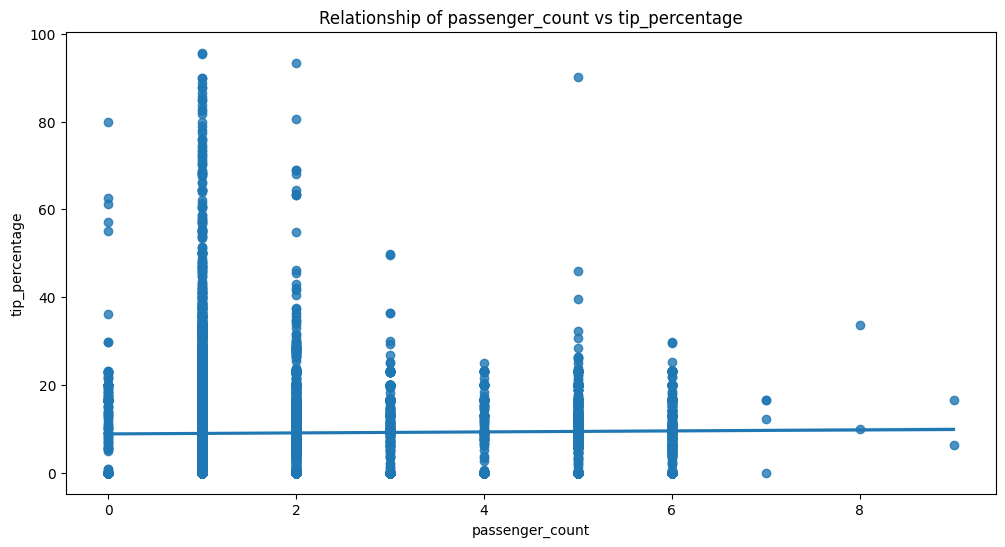

In [236]:
# Hasil regplot menunjukkan sedikit korelasi positif antara jumlah penumpang dan tip_percentage.

plt.figure(figsize=(12,6))
sns.regplot(data=df_trip_merge, x='passenger_count', y='tip_percentage')
plt.title('Relationship of passenger_count vs tip_percentage')

plt.show()

In [237]:
# Hasil df_trip_merge csv file akan di send ke local untuk di export ke Tableau guna untuk analisa selajutnya.

df_trip_merge.to_csv(r'C:\Users\ASUS\OneDrive\Desktop\Purwadhika\Dataset\df_trip_merge.csv', index=False)



### Kesimpulan dan Rekomendasi

1. Apakah tip_percentage yang didapatkan tergantung pada trip_distance, trip_lengths, passenger_count, total_amount?

tip_percentage mempunyai korelasi positif dengan tip_amount, total_amount, dan fare_amount. 

tip_percentage tidak menunjukkan adanya korelasi positif atau bahkan negatif dengan trip_distance, trip_length_seconds dan passenger_count.

trip_type 1.0 (street-hail) mempunyai lebih banyak outliers positif dan median lebih tinggi dari trip_type 2.0 (dispatch)

2. Melalui tableau akan dianalisa daerah-daerah mana saja (melalui Borough dan Zone) yang berpotensi mendapatkan trip_percentage tertinggi?

Untuk Pickup, top 3 Borough adalah Brooklyn, Manhattan dan EWR (Newark Airport). Dan untuk Zone top tip_percentage di West Brigton, Roosevelt Island dan Sunset Park East.Sedangkan untuk airport perbedaannya tidak terlalu besar.


Untuk Pickup trip 1 (Street-hail), top 2 Borough adalah Brooklyn dan Manhattan mendekati 10%. Dan untuk Zone top tip_percentage di West Brighton yang mendekati 40%. Sedangkan untuk airport, LaGuardia adalah yang tertinggi di 17%.

Untuk Pickup trip 2 (Dispatch), top 3 Borough adalah Brooklyn, Newark Airport dan Unknown (dari luar NYC). Dan untuk Zone tip_percentage tidak terdapat perbedaan jauh di top 3 zonenya. Sedangkan untuk airport, Newark adalah yang tertinggi di 9.5%.

Untuk Dropoff, top 3 Borough adalah Manhattan, Brooklyn dan EWR (Newark Airport). Dan untuk Zone top tip_percentage di Battery Park.Sedangkan untuk airport perbedaannya tidak terlalu besar.


Untuk Dropoff trip 1 (Street-hail), top 3 Borough adalah Manhattan, Brooklyn dan EWR (Newark Airport) mendekati 10%. Dan untuk Zone top tip_percentage tidak ada banyak perbedaan antara Battery Park, Grymes Hill/ Clifton, Green-Wood Cemetary yang mendekati 18%. Sedangkan untuk airport, LaGuardia adalah yang tertinggi di 11%.

Untuk Pickup trip 2 (Dispatch), top 3 Borough adalah Newark Airport, Brooklyn dan Unknown (dari luar NYC). Dan untuk Zone tip_percentage tidak terdapat perbedaan jauh di top 3 zonenya. Sedangkan untuk airport, LaGuardia adalah yang tertinggi di 12.5%.

3. Dan juga akan dianalisan dari segi time analysis (pukul berapa, hari-hari apa saja) untuk 	pickup dan dropoff yang berpotensi mendapatkan tips_percentage tertinggi.

Untuk Pickup Time max tip_percentage didapat antara pukul 6-8 pagi di sekitar 9% dan pukul 18-22 malam sekitar 10%.

Untuk DropOff Time max tip_percentage didapat antara pukul 6-8 pagi di sekitar 10% dan pukul 18-22 malam sekitar 10%.

Untuk Trip 1:
Untuk Pickup Time max tip_percentage didapat antara pukul 6-8 pagi di sekitar 9.5% dan pukul 17-22 malam sekitar 10%.

Untuk DropOff Time max tip_percentage didapat antara pukul 7-8 pagi di sekitar 10% dan pukul 18-21 malam sekitar 10%.

Untuk Trip 2:
Untuk Pickup Time max tip_percentage didapat di pukul 2 pagi di sekitar 9.3%, 8-10 pagi di sekitar 9% dan pukul 20 dan 23 malam di 8.3 dan 8.8%. 

Untuk DropOff Time max tip_percentage didapat di pukul 2 pagi di sekitar 9.5%, pukul 11 siang di 9.3%, pukul 23 malam di 10%.

Untuk DayofWeek dapat diambil kesimpulan hari Sabtu dan Minggu secara rata-rata bisa mendapatkan tip_percentage yang lebih tinggi dari hari yang lain.

Begitupula untuk Trip 1 dan Trip 2 trend yang sama bisa didapatkan.


### Rekomendasi

1. Disarankan untuk driver easyTrip memprioritaskan panggilan taxi melalui street-hail dan tidak melalui dispatch. Bisa dilihat dari jumlah outliers positif dan median yang jauh lebih tinggi di Trip 1.0 (Street-Hail) dibanding 2.0 (Dispatch).

2. Tidak perlu menerima panggilan yang tergantung pada trip_distance, trip_length atau passenger_counts karena terbukti tidak ada korelasi positif bahkan negatif terhadap faktor tersebut.

3. Daerah-daerah yang berpotensi untuk mendapatkan tip_percentage tertinggi adalah Manhattan, Brooklyn dan Newark Airport. Manhattan adalah daerah pusat bisnis di NYC, One Trade Center dan Wall street terletak dilokasi ini. Brooklyn adalah daerah entertainment dan perumahaan mewah di NYC.

4. Jam-jam operasi bisa difokuskan pada pukul 7-9 pagi dan 4-8 malam dimana pada waktu-waktu tersebut adalah waktu masuk kerja dan pulang kerja.

5. Hari-hari yang berpotensi mendapatkan tip_percentage tertinggi di hari weekend sabtu dan minggu.


